# Plots for the 2MDM analysis

In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from auxPlots import columnsDict, defaultPars

pd.option_context('display.max_columns', None)
pd.option_context('display.max_rows', None)

pd.options.mode.chained_assignment = None #Disable copy warnings
plt.rcParams.update(defaultPars)

cm = plt.colormaps['RdYlBu']

#### Get data in pcl format and print all columns names

In [2]:
#Merge with SModelS DataFrame
pclFiles = ['../data/smodels_results.pcl']
dfs = [pd.read_pickle(i) for i in pclFiles]
dataDF = pd.concat(dfs, ignore_index=True)
dataDF.rename(columns=columnsDict,inplace=True)
dropCols = [c for c in dataDF.columns if ('Output' in c or 'weight' in c)]
dataDF.drop(columns=dropCols,inplace=True)
dataDF.set_index('filename',drop=True,inplace=True)
print(dataDF.columns.values.tolist()) #Print all columns names

['mChi', 'mS', 'mZp', 'mass.9000002', 'mass.9000003', 'mass.9000004', 'mass.9000005', 'width.9000002', 'width.9000003', 'width.9000004', 'width.9000005', 'width.9000006', 'width.9900026', 'width.9900032', 'gchi', 'gq', 'sina', 'extpar.4', 'xsec8TeV(fb).9900032', 'xsec8TeV(fb).9900026', 'xsec13TeV(fb).9900032', 'xsec13TeV(fb).9900026', 'BRs.sd.W-,W+', 'BRs.sd.higgs,higgs', 'BRs.sd.Z,Z', 'BRs.sd.t-,t+', 'BRs.sd.chi,chi', 'BRs.sd.ta+,ta-', 'BRs.zp.chi,chi', 'BRs.zp.c,c', 'BRs.zp.q,q', 'BRs.zp.b,b', 'BRs.zp.t-,t+', 'totalxsec13TeV(fb)', 'totalxsec8TeV(fb)', 'CombinedRes', 'Total xsec for missing topologies (fb)', 'Total xsec for missing topologies with displaced decays (fb)', 'Total xsec for missing topologies with prompt decays (fb)', 'Total xsec for topologies outside the grid (fb)', 'ExptRes.result0.maxcond', 'ExptRes.result0.theory prediction (fb)', 'ExptRes.result0.upper limit (fb)', 'ExptRes.result0.expected upper limit (fb)', 'ExptRes.result0.TxNames', 'ExptRes.result0.Mass (GeV)', 

#### Filter couplings

In [3]:
gchi = 0.01
gq = 0.1
sina = 0.25
dataDF = dataDF[(dataDF['gchi'] == gchi) & (dataDF['gq'] == gq) & (dataDF['sina'] == sina)]
len(dataDF)

3000

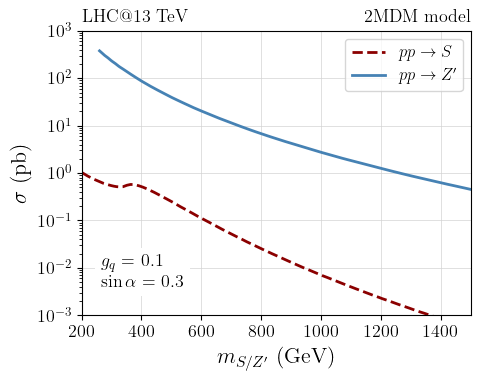

In [5]:
gq_new = 0.1
sina_new = 0.3

x_s = np.array(dataDF['mS'])
# Rescale pp -> S cross-section by sina**2
y_s = np.array(dataDF['xsec13TeV(fb).9900026']*((sina_new/dataDF['sina'])**2)/1e3)
y_s = y_s[np.argsort(x_s)]
x_s = x_s[np.argsort(x_s)]
plt.plot(x_s,y_s,label=r'$p p \to S$',c='darkred',linestyle='dashed')

# Rescale pp -> Zp cross-section by gq**2
x_zp = np.array(dataDF['mZp'])
y_zp = np.array(dataDF['xsec13TeV(fb).9900032']*((gq_new/dataDF['gq'])**2)/1e3)
y_zp = y_zp[np.argsort(x_zp)]
x_zp = x_zp[np.argsort(x_zp)]
plt.plot(x_zp,y_zp,label=r'$p p \to Z^\prime$',c='steelblue')

plt.yscale('log')
plt.xlim(200.,1500.0)
plt.ylim(1e-3,1e3)

textstr = '\n'.join((
    r'$g_q =$ %1.1f' %gq_new, 
    r'$\sin\alpha =$ %1.1f' %sina_new))
plt.text(0.05,0.1,textstr,
         bbox=dict(facecolor='white', edgecolor='none'),
         transform = plt.gca().transAxes)



plt.ylabel(r'$\sigma$ (pb)')
plt.xlabel(r'$m_{S/Z^\prime}$ (GeV)')
plt.legend(fontsize=12)
plt.title('LHC@13 TeV', loc='left')
plt.title('2MDM model', loc='right')
plt.tight_layout()
plt.savefig('./figures/2mdm_xsecs.png')
plt.show()